# **Data pre processing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read csv files, Data & Lables
data_exp = pd.read_csv ("denboer2009-expr.csv").T
data_phen = pd.read_csv ("denboer2009-pheno (2).csv", index_col=0) # Set first column (patient's ID) as index

# assign first row as columns name 
header = data_exp.iloc[0]
data_exp = data_exp[1:]
data_exp.columns = header

# Add lables to data
labled_df = pd.merge(data_exp, data_phen['sample.labels'], left_index= True , right_index= True)



In [2]:
# Convert lables to binary form
lables = []
for row in labled_df['sample.labels']:
  if row == "T":
    lables.append("T")
  else:
    lables.append("O")


In [3]:
# Split Data to train and test
X_train, X_test, y_train, y_test = train_test_split(
     labled_df.drop('sample.labels', 1), lables, test_size=0.2, random_state=42)

# **Decision Tree**

In [4]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

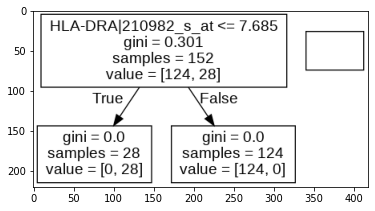

In [5]:
# Build DT model
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [6]:
# Model evaluation
from sklearn.metrics import confusion_matrix


y_pred = dtree.predict(X_test) 
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 1,  7]])

# **Ranom forest**

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=20, random_state=0)

In [9]:
# Model evaluation
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test) 
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 0,  8]])

# **SVM**

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [11]:
# Model evaluation
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test) 
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 2,  6]])

# **KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Model evaluation
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test) 
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 2,  6]])

# **Clustering**

# **K-means**

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [27]:
# Convert inteder labels to string
y_pred_int = kmeans.predict(X_test)
y_pred_str = []
for int_label in y_pred_int:
  if int_label == 0:
    y_pred_str.append("O")
  else:
    y_pred_str.append("T")

In [28]:
# Model evaluation
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred_str)

array([[30,  0],
       [ 0,  8]])

# **hierarchical clustering**

In [30]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X_train)

In [35]:
# Convert inteder labels to string
y_pred_int = clustering.fit_predict(X_test)
y_pred_str = []
for int_label in y_pred_int:
  if int_label == 0:
    y_pred_str.append("O")
  else:
    y_pred_str.append("T")

In [36]:
# Model evaluation
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_pred_str)

array([[30,  0],
       [ 0,  8]])